## Maximum Likelihood as a linear reegression problem

**Goal:** Demonstrate the maximum likelihood approach for regression on a simple example. 

**Usage:** Step through the code to get a better understanding.

**Dataset:** 

**Content:**

[open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book_playground/blob/master/demo_likelihood.ipynb)


#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.linear_model import LinearRegression

Here we read in the systolic blood pressure and the age of the 33 American women in our dataset. Then we use the sklearn library to find the optimal values for the slope a and the intercept b.

Calculates the density $f(y,\mu,\sigma)$ of a normal distribution at $y$, given the parameters $\mu$ and $\sigma$ using:

$$
  f(y, \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(y - \mu)^2}{2 \sigma^2}}
$$



In [2]:
def f(y, mu, sigma=20):
  return (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (y - mu)**2 / (2 * sigma**2)))

NameError: name 'normal_density' is not defined

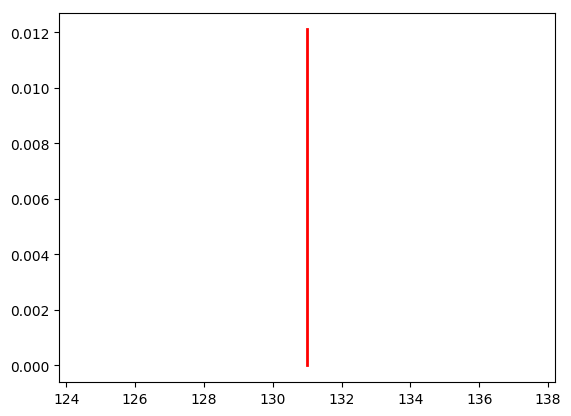

In [3]:
plt.style.use('default') 
sbp = np.linspace(60,160,50)
plt.plot([131, 131], [0, f(131,111)], 'k-', lw=2,color='red')
plt.plot(sbp, f(sbp, 111),linewidth=3)
plt.xlabel('sbp')
plt.ylabel('probability density')
plt.savefig('ch4_10b.pdf')

In [ ]:
normal_density(131, 111)

In [ ]:
# Blood Pressure data
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
x = np.asarray(x, np.float32) 
y = np.asarray(y, np.float32)

In [ ]:
# 10          20       30        40       50         55
#1234567890123456789012345678901234567890123456789012345
best_a = best_b = 0
best_like=1000000
for a in np.linspace(0,3,20): #A
    for b in np.linspace(80,200,100):#A
        mus = a*x + b #B
        neg_lok_like = -np.sum(np.log(f(y, mus))) #C
        if (neg_lok_like < best_like): #D
            best_a = a
            best_b = b
            best_like = neg_lok_like
print('Max. Lik. estimates: a ', best_a, ' b ', best_b)#E

#A Looping over all possible values of a,b
#B Estimates the parameters mu for all training data
#C estimating the negative log-likelihood 
#D Hura we found new minimum
#E Max. Lik. estimates: a  1.1052  b  87.2727